In [1]:
import pandas as pd
from sqlalchemy import create_engine
from pymongo import MongoClient


In [19]:
import os

file_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\cdphe_acs20172021_censustract_indicators_-3178988615017728164 (2).csv"

if os.path.exists(file_path):
    indicators_df = pd.read_csv(file_path)
    print("File loaded successfully.")
else:
    print("File not found. Please check the path.")


File loaded successfully.


In [21]:
import os

file_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\CDPHE_Composite_Selected_Health_Outcome_Dataset_(Census_Tract) (1).csv"

if os.path.exists(file_path):
    indicators_df = pd.read_csv(file_path)
    print("File loaded successfully.")
else:
    print("File not found. Please check the path.")


File loaded successfully.


In [23]:
import os

file_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\CDPHE_Health_Facilities (1).csv"

if os.path.exists(file_path):
    indicators_df = pd.read_csv(file_path)
    print("File loaded successfully.")
else:
    print("File not found. Please check the path.")


File loaded successfully.


In [27]:
# File paths
indicators_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\cdphe_acs20172021_censustract_indicators_-3178988615017728164 (2).csv"
health_outcomes_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\CDPHE_Composite_Selected_Health_Outcome_Dataset_(Census_Tract) (1).csv"
health_facilities_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\CDPHE_Health_Facilities (1).csv"

# Load datasets
indicators_df = pd.read_csv(indicators_path)
health_outcomes_df = pd.read_csv(health_outcomes_path)
health_facilities_df = pd.read_csv(health_facilities_path)

# Display the first few rows of each
display(indicators_df.head(), health_outcomes_df.head(), health_facilities_df.head())


,OBJECTID_1,FIPS,Full_FIPS_Code,Tract_Name,Tract_FIPS,State,County,Percent_THU_Occupied_Family_Male_NoPartner,Housing_THU_Occupied_Family_Female_NoPartner,Percent_THU_Occupied_Family_Female_NoPartner,...,Percent_OHU_Built_1940_1949,Percent_OHU_Built_1939_Earlier,Housing_Poverty_Median_Household_Income,Housing_Poverty_Mean_Household_Income,Area_Land_Square_Miles,Area_Water_Square_Miles,Population_Density_PerSqMi,Shape__Area,Shape__Length,GlobalID
0,1,8023972600,1400000US08023972600,"Census Tract 9726, Costilla County, Colorado",8023972600,CO,COSTILLA,2.5,84,10.9,...,1.7,11.0,43190,51915,600.270189,1.454154,3.151914,0.158671,1.998095,eb930f7c-3ea7-4e83-9b6c-7bb56a27242a
1,2,8029964600,1400000US08029964600,"Census Tract 9646, Delta County, Colorado",8029964600,CO,DELTA,0.5,63,3.6,...,3.7,23.6,66738,79550,257.527079,0.449223,14.417901,0.069457,1.489627,87012fdb-7ccb-4db3-8d94-253d5ddd1247
2,3,8053973100,1400000US08053973100,"Census Tract 9731, Hinsdale County, Colorado",8053973100,CO,HINSDALE,0.0,40,9.0,...,1.3,12.4,45714,72248,1117.230335,5.916892,0.767971,0.297771,2.824511,ac4c1eb3-3907-49be-af38-c087d9eb1824
3,4,8069001602,1400000US08069001602,"Census Tract 16.02, Larimer County, Colorado",8069001602,CO,LARIMER,1.1,112,5.2,...,0.0,0.0,95962,112801,1.173036,0.003898,4713.411169,0.000322,0.071983,75d13d59-05fc-407e-9e66-f3e365a6b947
4,5,8069000600,1400000US08069000600,"Census Tract 6, Larimer County, Colorado",8069000600,CO,LARIMER,0.0,0,0.0,...,0.0,1.0,22163,25420,0.760141,0.000000,9495.606546,0.000209,0.060119,9d53a264-c85b-4ffa-8f76-b92ee8cbdcf0


,OBJECTID,TRACT_FIPS,ASTHMA_ADJRATE,ASTHMA_L95CI,ASTHMA_U95CI,ASTHMA_STATEADJRATE,ASTHMA_SL95CI,ASTHMA_SU95CI,TRACT_NAME,COUNTY_NAME,...,INFLUENZA_SL95CI,INFLUENZA_SU95CI,INFLUENZA_DISPLAY,POD_DEATH_ADJRATE,POD_DEATH_L95CI,POD_DEATH_U95CI,POD_DEATH_STATEADJRATE,POD_DEATH_STATEL95CI,POD_DEATH_STATEU95CI,POD_DISPLAY
0,1,8043979000,478.25,344.32,612.18,619.91,617,622.82,"Census Tract 9790, Fremont County, Colorado",FREMONT,...,54,55.75,Not Different Than State Average,NaN,NaN,NaN,9.25,8.89,9.6,No Events or Data Suppressed
1,2,8045951600,273.05,198.85,347.26,619.91,617,622.82,"Census Tract 9516, Garfield County, Colorado",GARFIELD,...,54,55.75,Not Different Than State Average,0.0,0.0,0.0,9.25,8.89,9.6,No Events or Data Suppressed
2,3,8069002803,0.00,0.00,0.00,619.91,617,622.82,"Census Tract 28.03, Larimer County, Colorado",LARIMER,...,54,55.75,No Events or Data Suppressed,0.0,0.0,0.0,9.25,8.89,9.6,No Events or Data Suppressed
3,4,8125963200,353.93,284.52,423.33,619.91,617,622.82,"Census Tract 9632, Yuma County, Colorado",YUMA,...,54,55.75,Higher Than State Average,0.0,0.0,0.0,9.25,8.89,9.6,No Events or Data Suppressed
4,5,8069002401,542.50,244.83,840.18,619.91,617,622.82,"Census Tract 24.01, Larimer County, Colorado",LARIMER,...,54,55.75,Not Different Than State Average,0.0,0.0,0.0,9.25,8.89,9.6,No Events or Data Suppressed


,X,Y,OBJECTID,Facility_ID,Facility_Name,Facility_Type_Code,Facility_Type,Map_Symbol,Facility_Type_Detail,Facility_Type_Abbreviation,Licensed_Beds_Total,Telephone,County,Address_Full,Latitude,Longitude,CDPHE_HFEMS_Licensed,Operating_Status,Date_Data_Updated,Source
0,-104.868362,39.656151,1,04K461,# 1 HOME CARE AGENCY CORPORATION,05E,All Other Factypes,Home Health,Home Care Agency-In Home Support Services (Med...,HCA-IHSS,0,303-306-0404,DENVER,"10200 E GIRARD AVE BLDG A STE 103, DENVER, CO...",39.656151,-104.868362,yes,ACTIVE,2024/12/04 07:00:00+00,CDPHE Health Facilities and Emergency Medical ...
1,-104.868362,39.656151,2,10C962,# 1 HOME CARE AGENCY CORPORATION,05D,Home Care Agency,Home Health,Home Care Agency-Personal Care/Homemaker (Medi...,HCA-PHS,0,303-306-0404,DENVER,"10200 E GIRARD AVE BLDG A STE 103, DENVER, CO...",39.656151,-104.868362,yes,ACTIVE,2024/12/04 07:00:00+00,CDPHE Health Facilities and Emergency Medical ...
2,-104.896904,39.628658,3,04I8ZR,#1 NOOR HOME CARE,05E,All Other Factypes,Home Health,Home Care Agency-In Home Support Services (Med...,HCA-IHSS,0,NaN,DENVER,"7900 E UNION AVE STE 1100, DENVER, CO 80237",39.628658,-104.896904,yes,ACTIVE,2024/12/04 07:00:00+00,CDPHE Health Facilities and Emergency Medical ...
3,-104.896904,39.628658,4,04YPBY,#1 NOOR HOME CARE,05D,Home Care Agency,Home Health,Home Care Agency-Personal Care/Homemaker (Medi...,HCA-PHS,0,720-324-3242,DENVER,"7900 E UNION AVE STE 1100, DENVER, CO 80234",39.628658,-104.896904,yes,ACTIVE,2024/12/04 07:00:00+00,CDPHE Health Facilities and Emergency Medical ...
4,-104.896904,39.628658,5,0431O0,#1 NOOR HOME CARE,05A,Home Health Agency,Home Health,Home Health Agency (Cert Eligible),HHA-LCE,0,720-324-3242,DENVER,"7900 E UNION AVE STE 1100, DENVER, CO 80237",39.628658,-104.896904,yes,ACTIVE,2024/12/04 07:00:00+00,CDPHE Health Facilities and Emergency Medical ...


In [29]:
# Check basic info for each dataset
print("Indicators Dataset:")
print(indicators_df.info())

print("\nHealth Outcomes Dataset:")
print(health_outcomes_df.info())

print("\nHealth Facilities Dataset:")
print(health_facilities_df.info())

Indicators Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Columns: 230 entries, OBJECTID_1 to GlobalID
dtypes: float64(108), int64(117), object(5)
memory usage: 2.5+ MB
None

Health Outcomes Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBJECTID                1249 non-null   int64  
 1   TRACT_FIPS              1249 non-null   int64  
 2   ASTHMA_ADJRATE          1243 non-null   float64
 3   ASTHMA_L95CI            1243 non-null   float64
 4   ASTHMA_U95CI            1243 non-null   float64
 5   ASTHMA_STATEADJRATE     1249 non-null   float64
 6   ASTHMA_SL95CI           1249 non-null   int64  
 7   ASTHMA_SU95CI           1249 non-null   float64
 8   TRACT_NAME              1249 non-null   object 
 9   COUNTY_NAME             1249 non-null   object 
 10  ASTHMA_DISPLAY  

In [31]:
# Standardize column names to lowercase
indicators_df.columns = indicators_df.columns.str.lower()
health_outcomes_df.columns = health_outcomes_df.columns.str.lower()
health_facilities_df.columns = health_facilities_df.columns.str.lower()

# Check for missing values
print(indicators_df.isnull().sum())
print(health_outcomes_df.isnull().sum())
print(health_facilities_df.isnull().sum())


objectid_1                    0
fips                          0
full_fips_code                0
tract_name                    0
tract_fips                    0
                             ..
area_water_square_miles       0
population_density_persqmi    0
shape__area                   0
shape__length                 0
globalid                      0
Length: 230, dtype: int64
objectid                    0
tract_fips                  0
asthma_adjrate              6
asthma_l95ci                6
asthma_u95ci                6
                         ... 
pod_death_u95ci           522
pod_death_stateadjrate      0
pod_death_statel95ci        0
pod_death_stateu95ci        0
pod_display                 0
Length: 67, dtype: int64
x                               0
y                               0
objectid                        0
facility_id                     0
facility_name                   0
facility_type_code              0
facility_type                   0
map_symbol                   

In [33]:
# Display summary of each dataset
print(indicators_df.head())
print(health_outcomes_df.head())
print(health_facilities_df.head())

# Check column names and data types
print(indicators_df.info())
print(health_outcomes_df.info())
print(health_facilities_df.info())

   objectid_1        fips        full_fips_code  \
0           1  8023972600  1400000US08023972600   
1           2  8029964600  1400000US08029964600   
2           3  8053973100  1400000US08053973100   
3           4  8069001602  1400000US08069001602   
4           5  8069000600  1400000US08069000600   

                                     tract_name  tract_fips state    county  \
0  Census Tract 9726, Costilla County, Colorado  8023972600    CO  COSTILLA   
1     Census Tract 9646, Delta County, Colorado  8029964600    CO     DELTA   
2  Census Tract 9731, Hinsdale County, Colorado  8053973100    CO  HINSDALE   
3  Census Tract 16.02, Larimer County, Colorado  8069001602    CO   LARIMER   
4      Census Tract 6, Larimer County, Colorado  8069000600    CO   LARIMER   

   percent_thu_occupied_family_male_nopartner  \
0                                         2.5   
1                                         0.5   
2                                         0.0   
3                     

In [35]:
indicators_df.columns = indicators_df.columns.str.lower()
health_outcomes_df.columns = health_outcomes_df.columns.str.lower()
health_facilities_df.columns = health_facilities_df.columns.str.lower()

In [37]:
# Check for missing values
print(indicators_df.isnull().sum())
print(health_outcomes_df.isnull().sum())
print(health_facilities_df.isnull().sum())

objectid_1                    0
fips                          0
full_fips_code                0
tract_name                    0
tract_fips                    0
                             ..
area_water_square_miles       0
population_density_persqmi    0
shape__area                   0
shape__length                 0
globalid                      0
Length: 230, dtype: int64
objectid                    0
tract_fips                  0
asthma_adjrate              6
asthma_l95ci                6
asthma_u95ci                6
                         ... 
pod_death_u95ci           522
pod_death_stateadjrate      0
pod_death_statel95ci        0
pod_death_stateu95ci        0
pod_display                 0
Length: 67, dtype: int64
x                               0
y                               0
objectid                        0
facility_id                     0
facility_name                   0
facility_type_code              0
facility_type                   0
map_symbol                   

In [41]:
print("Indicators DataFrame Columns:", indicators_df.columns)
print("Health Outcomes DataFrame Columns:", health_outcomes_df.columns)
print("Health Facilities DataFrame Columns:", health_facilities_df.columns)

Indicators DataFrame Columns: Index(['objectid_1', 'fips', 'full_fips_code', 'tract_name', 'tract_fips',
       'state', 'county', 'percent_thu_occupied_family_male_nopartner',
       'housing_thu_occupied_family_female_nopartner',
       'percent_thu_occupied_family_female_nopartner',
       ...
       'percent_ohu_built_1940_1949', 'percent_ohu_built_1939_earlier',
       'housing_poverty_median_household_income',
       'housing_poverty_mean_household_income', 'area_land_square_miles',
       'area_water_square_miles', 'population_density_persqmi', 'shape__area',
       'shape__length', 'globalid'],
      dtype='object', length=230)
Health Outcomes DataFrame Columns: Index(['objectid', 'tract_fips', 'asthma_adjrate', 'asthma_l95ci',
       'asthma_u95ci', 'asthma_stateadjrate', 'asthma_sl95ci', 'asthma_su95ci',
       'tract_name', 'county_name', 'asthma_display', 'diabetes_adjrate',
       'diabetes_l95ci', 'diabetes_u95ci', 'diabetes_stateadjrate',
       'diabetes_sl95ci', 'diabe

In [43]:
indicators_df.columns = indicators_df.columns.str.lower()
health_outcomes_df.columns = health_outcomes_df.columns.str.lower()
health_facilities_df.columns = health_facilities_df.columns.str.lower()


In [45]:
for df, name in zip([indicators_df, health_outcomes_df, health_facilities_df], 
                    ["Indicators", "Health Outcomes", "Health Facilities"]):
    print(f"{name} contains 'county':", 'county' in df.columns)

Indicators contains 'county': True
Health Outcomes contains 'county': False
Health Facilities contains 'county': True


In [47]:
health_outcomes_df.rename(columns={"county_name": "county"}, inplace=True)

In [53]:
print("Indicators DataFrame shape:", indicators_df.shape)
print("Health Outcomes DataFrame shape:", health_outcomes_df.shape)
print("Health Facilities DataFrame shape:", health_facilities_df.shape)

Indicators DataFrame shape: (1447, 230)
Health Outcomes DataFrame shape: (1249, 67)
Health Facilities DataFrame shape: (4806, 20)


In [90]:
print("Indicators DataFrame Columns:", indicators_df.columns.tolist())
print("Health Outcomes DataFrame Columns:", health_outcomes_df.columns.tolist())


Indicators DataFrame Columns: ['objectid_1', 'fips', 'full_fips_code', 'tract_name', 'tract_fips', 'state', 'county', 'percent_thu_occupied_family_male_nopartner', 'housing_thu_occupied_family_female_nopartner', 'percent_thu_occupied_family_female_nopartner', 'housing_thu_occupied_family_singleparent', 'percent_thu_occupied_family_singleparent', 'population_total', 'population_ageunder5', 'percent_population_ageunder5', 'population_age5to9', 'percent_population_age5to9', 'population_age5to17', 'percent_population_age5to17', 'population_age10to17', 'percent_population_age10to17', 'population_ageunder18', 'percent_population_ageunder18', 'population_ageover17', 'percent_population_ageover17', 'population_ageover64', 'percent_population_ageover64', 'population_ageover84', 'percent_population_ageover84', 'population_ageunder5_and_ageover64', 'percent_population_ageunder5_and_ageover64', 'race_white', 'percent_race_white', 'race_african_american', 'percent_race_african_american', 'race_amer

In [98]:
indicators_df = indicators_df[["county", "fips", "population_total", "population_density_persqmi"]]
health_outcomes_df = health_outcomes_df[["county", "diabetes_adjrate", "hd_adjrate"]]
health_facilities_df = health_facilities_df[["county", "latitude", "longitude", "facility_type"]]

In [110]:
print(merged_df.info())  # Check for missing values and data types
print(merged_df.head())  # Display a sample of the merged data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130152 entries, 0 to 130151
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   county                      130152 non-null  object 
 1   fips                        130152 non-null  int64  
 2   population_total            130152 non-null  int64  
 3   population_density_persqmi  130152 non-null  float64
 4   diabetes_adjrate            129289 non-null  float64
 5   hd_adjrate                  128436 non-null  float64
 6   latitude                    130149 non-null  float64
 7   longitude                   130149 non-null  float64
 8   facility_type               130149 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 8.9+ MB
None
     county        fips  population_total  population_density_persqmi  \
0  COSTILLA  8023972600              1892                    3.151914   
1  COSTILLA  8023972600              18

In [112]:
# Example: Fill missing values with 0 or a default value
merged_df.fillna(0, inplace=True)


In [114]:
merged_df["diabetes_hospitalization_rate_per_100k"] = (
    merged_df["diabetes_adjrate"] / merged_df["population_total"] * 100000
)

In [7]:
import pandas as pd

# File paths
indicators_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\cdphe_acs20172021_censustract_indicators_-3178988615017728164 (2).csv"
health_outcomes_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\CDPHE_Composite_Selected_Health_Outcome_Dataset_(Census_Tract) (1).csv"
health_facilities_path = r"C:\Users\tamya\OneDrive\Desktop\Project 3\CDPHE_Health_Facilities (1).csv"

# Load datasets
indicators_df = pd.read_csv(indicators_path)
health_outcomes_df = pd.read_csv(health_outcomes_path)
health_facilities_df = pd.read_csv(health_facilities_path)

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [9]:
print(indicators_df.head())
print(health_outcomes_df.head())
print(health_facilities_df.head())


   OBJECTID_1        FIPS        Full_FIPS_Code  \
0           1  8023972600  1400000US08023972600   
1           2  8029964600  1400000US08029964600   
2           3  8053973100  1400000US08053973100   
3           4  8069001602  1400000US08069001602   
4           5  8069000600  1400000US08069000600   

                                     Tract_Name  Tract_FIPS State    County  \
0  Census Tract 9726, Costilla County, Colorado  8023972600    CO  COSTILLA   
1     Census Tract 9646, Delta County, Colorado  8029964600    CO     DELTA   
2  Census Tract 9731, Hinsdale County, Colorado  8053973100    CO  HINSDALE   
3  Census Tract 16.02, Larimer County, Colorado  8069001602    CO   LARIMER   
4      Census Tract 6, Larimer County, Colorado  8069000600    CO   LARIMER   

   Percent_THU_Occupied_Family_Male_NoPartner  \
0                                         2.5   
1                                         0.5   
2                                         0.0   
3                     

In [11]:
indicators_df.columns = indicators_df.columns.str.lower()
health_outcomes_df.columns = health_outcomes_df.columns.str.lower()
health_facilities_df.columns = health_facilities_df.columns.str.lower()

In [27]:
# Select only relevant columns for each DataFrame
indicators_df = indicators_df[["county", "fips", "population_total", "population_density_persqmi"]]
health_outcomes_df = health_outcomes_df[["county", "diabetes_adjrate", "hd_adjrate"]]
health_facilities_df = health_facilities_df[["county", "latitude", "longitude", "facility_type"]]

In [29]:
# Check for missing values
print(indicators_df.isnull().sum())
print(health_outcomes_df.isnull().sum())
print(health_facilities_df.isnull().sum())

# Example: Fill missing values with a default value or remove rows
indicators_df.fillna(0, inplace=True)
health_outcomes_df.fillna(0, inplace=True)

county                        0
fips                          0
population_total              0
population_density_persqmi    0
dtype: int64
county               0
diabetes_adjrate     8
hd_adjrate          18
dtype: int64
county           0
latitude         0
longitude        0
facility_type    0
dtype: int64


In [31]:
# Merge Indicators and Health Outcomes
merged_df = indicators_df.merge(health_outcomes_df, on="county", how="left")

# Merge with Health Facilities
merged_df = merged_df.merge(health_facilities_df, on="county", how="left")

print(merged_df.head())

     county        fips  population_total  population_density_persqmi  \
0  COSTILLA  8023972600              1892                    3.151914   
1  COSTILLA  8023972600              1892                    3.151914   
2  COSTILLA  8023972600              1892                    3.151914   
3  COSTILLA  8023972600              1892                    3.151914   
4  COSTILLA  8023972600              1892                    3.151914   

   diabetes_adjrate  hd_adjrate   latitude   longitude       facility_type  
0           1404.62       61.16  37.199516 -105.426109  All Other Factypes  
1           1404.62       61.16  37.197281 -105.427406    Home Care Agency  
2           1404.62       61.16  37.046154 -105.521248  All Other Factypes  
3           1469.82      180.08  37.199516 -105.426109  All Other Factypes  
4           1469.82      180.08  37.197281 -105.427406    Home Care Agency  


In [32]:
merged_df["diabetes_rate_per_100k"] = (
    merged_df["diabetes_adjrate"] / merged_df["population_total"] * 100000
)
merged_df["heart_disease_rate_per_100k"] = (
    merged_df["hd_adjrate"] / merged_df["population_total"] * 100000
)

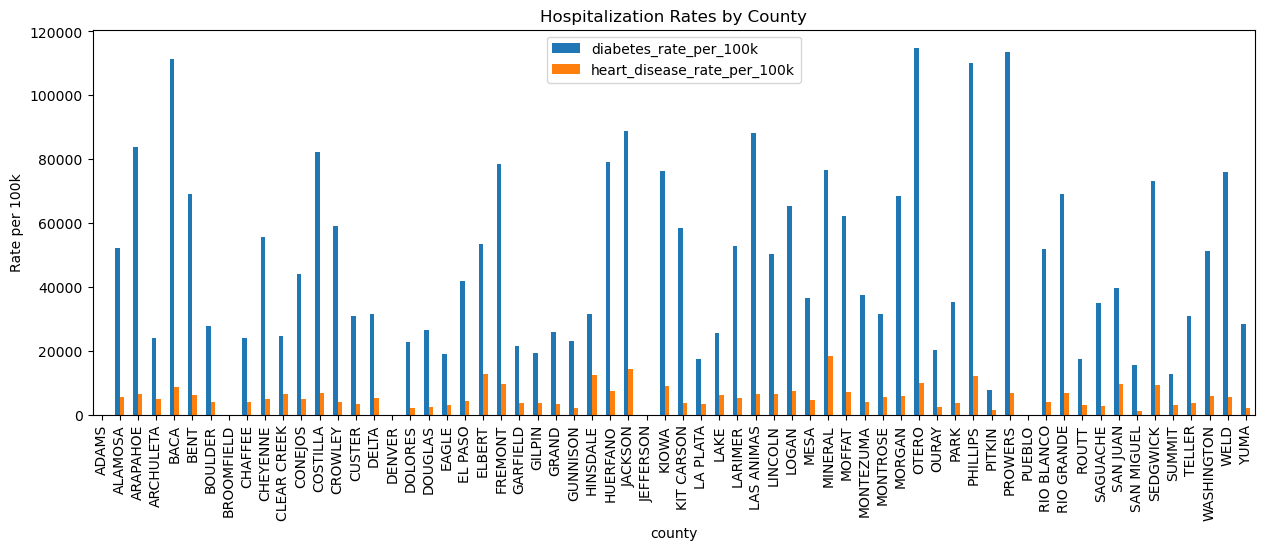

In [33]:
import matplotlib.pyplot as plt

merged_df.groupby("county")[["diabetes_rate_per_100k", "heart_disease_rate_per_100k"]].mean().plot(
    kind="bar", figsize=(15, 5)
)
plt.title("Hospitalization Rates by County")
plt.ylabel("Rate per 100k")
plt.show()

In [59]:
import folium

map_center = [39.5501, -105.7821]  # Center map on Colorado
m = folium.Map(location=map_center, zoom_start=7)

# Add facilities as points on the map
for _, row in health_facilities_df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color="blue",
        popup=row["facility_type"]
    ).add_to(m)

m.save("health_facility_map.html")


In [ ]:
rom sqlalchemy import create_engine

engine = create_engine("sqlite:///healthcare_analysis.db")
merged_df.to_sql("health_analysis", con=engine, if_exists="replace", index=False)

In [ ]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["healthcare_analysis"]
db["health_analysis"].insert_many(merged_df.to_dict("records"))


In [37]:
print(merged_df.describe())

               fips  population_total  population_density_persqmi  \
count  7.266949e+07      7.266949e+07                7.266949e+07   
mean   8.025914e+09      4.102323e+03                5.478403e+03   
std    2.374836e+07      1.660353e+03                4.373750e+03   
min    8.001008e+09      0.000000e+00                0.000000e+00   
25%    8.005080e+09      2.905000e+03                2.781604e+03   
50%    8.031001e+09      3.911000e+03                4.898052e+03   
75%    8.041004e+09      5.098000e+03                7.140957e+03   
max    8.125963e+09      1.401200e+04                3.153712e+04   

       diabetes_adjrate    hd_adjrate      latitude     longitude  \
count      7.266949e+07  7.266949e+07  7.266949e+07  7.266949e+07   
mean       1.596850e+03  1.395724e+02  3.957926e+01 -1.049021e+02   
std        9.824367e+02  7.715987e+01  3.615501e-01  2.037064e-01   
min        0.000000e+00  0.000000e+00  3.704615e+01 -1.089140e+02   
25%        9.280200e+02  9.207000

In [ ]:
for _, row in health_facilities_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Facility: {row['facility_type']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

In [57]:
from folium.plugins import HeatMap

# Create heat data using health facilities data
heat_data = [[row["latitude"], row["longitude"]] for _, row in health_facilities_df.iterrows()]

# Add heat map to the map
m = folium.Map(location=[39.5501, -105.7821], zoom_start=7)
HeatMap(heat_data).add_to(m)

# Save map to an HTML file
m.save("heatmap.html")
print("Heat map created and saved as 'heatmap.html'.")

Heat map created and saved as 'heatmap.html'.


In [61]:
print(health_facilities_df[["latitude", "longitude"]].head())

    latitude   longitude
0  39.656151 -104.868362
1  39.656151 -104.868362
2  39.628658 -104.896904
3  39.628658 -104.896904
4  39.628658 -104.896904


In [65]:
HeatMap(heat_data, radius=10, blur=15).add_to(m)

In [67]:
# Add markers for health facilities
for _, row in health_facilities_df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Facility: {row['facility_type']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Add heat map
HeatMap(heat_data).add_to(m)

# Save the combined map
m.save("combined_map.html")